In [0]:
import torch

In [0]:
#!Переменная! тензор
x = torch.tensor([[5.0, 10.0],
                  [1.0, 2.0]], requires_grad=True)


In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)

In [0]:
function = (torch.log(torch.log(x + 7))).prod()

In [0]:
#Взятие производной от function
function.backward()

In [0]:
#можем посмотреть как производная "разворачивалась"
print(function.grad_fn)
print(function.grad_fn.next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0])

In [0]:
#Результат взятия производной записывается в атрибут grad тензора
x.grad

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])

In [0]:
w = torch.tensor([[5.0, 10.0],
                  [1.0, 2.0]], requires_grad=True)

#Пройстейший градиентый спуск
def grad_descent(function, w, alpha, iter_num):
  for _ in range(iter_num):
    function(w).backward()
    #print(w.data)
    w.data -= alpha * w.grad
    w.grad.zero_()
  return w

In [0]:
def function(x):
  return (torch.log(torch.log(x + 7))).prod()

print(grad_descent(function, x, 0.001, 500))

tensor([[4.9900, 9.9947],
        [0.9775, 1.9824]], requires_grad=True)


In [0]:
#пользуемся opimizer'ом
def parabola_function(x):
  return 10 * (x**2).sum()

w = torch.tensor([[5.0, 10.0],
                  [1.0, 2.0]], requires_grad=True)

def grad_descent_opt(function, w, alpha=0.001, iter_num=500, solver='sgd'):
  if solver == 'sgd':
    optimizer = torch.optim.SGD([w], lr=alpha)
    for _ in range(iter_num):
      function(w).backward()
      optimizer.step()
      optimizer.zero_grad()
  else:
    raise RunTimeError('uknown solver')
  return w

print(grad_descent_opt(parabola_function, w, solver='sgd'))

tensor([[2.0512e-04, 4.1024e-04],
        [4.1024e-05, 8.2048e-05]], requires_grad=True)


In [0]:
import numpy as np
#график линий уровня функции
def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [0]:
#будем записывать историю изменения вектора w
w = torch.tensor([8., 8.], requires_grad=True)

def grad_descent_opt(function, w, alpha=0.001, iter_num=500, solver='sgd'):
  w_history = []
  if solver == 'sgd':
    optimizer = torch.optim.SGD([w], lr=alpha)
    for _ in range(iter_num):
      w_history.append(w.data.cpu().numpy().copy()) #в np можно переводить только cpu тензор
      function(w).backward()
      optimizer.step()
      optimizer.zero_grad()
  else:
    raise RunTimeError('uknown solver')
  return w, np.array(w_history)

_, dots = grad_descent_opt(parabola_function, w, solver='sgd')



In [0]:
dots[:, 1].shape

(500,)

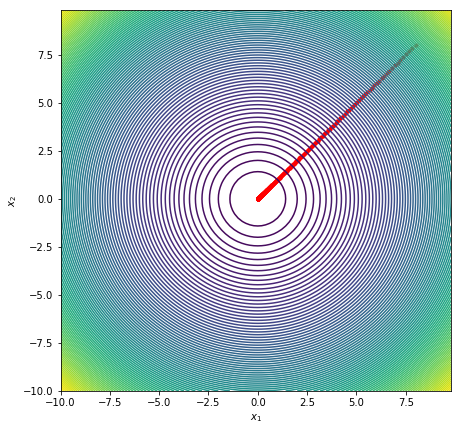

In [0]:
import matplotlib.pyplot as plt
show_contours(parabola_function)
plt.scatter(dots[:, 0], dots[:, 1], s=10, c='r');